In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats

# Checking Normality and 95% confidence level

In [2]:
consumption_data = [120,150,100, 200, 130, 170, 180, 110, 90, 160, 140, 210, 190, 170, 130, 120, 140, 110, 150, 180, 200, 170, 160, 140, 130, 120, 150, 140, 160, 150]

In [7]:
print (type(consumption_data))

<class 'list'>


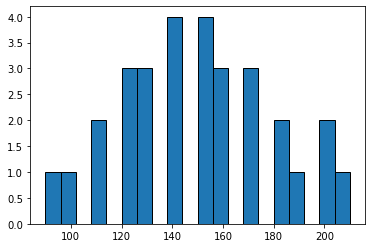

In [16]:
# Visually checking the normal distributrion
plt.hist(consumption_data, edgecolor='black', bins=20)
plt.show()

The Shapiro-Wilk test evaluates whether a dataset follows a normal distribution. Here’s how it works:

Quantifying Similarity:
The test superimposes a normal curve over the observed distribution.
It computes the percentage of our sample that overlaps with this curve (a similarity percentage).
Hypothesis Testing:
The null hypothesis assumes the population distribution is exactly normal.
The test calculates the probability of finding the observed (or a smaller) similarity percentage.
If the p-value is small (typically < 0.05), we reject the null hypothesis, indicating non-normality.

In [18]:
#The Shapiro-Wilk test checks for normality. If the p-value is greater than 0.05, the data is assumed to be normally distributed.
shapiro_result = shapiro(consumption_data)
print(f"Shapiro-Wilk p-value: {shapiro_result.pvalue:.6f}")

Shapiro-Wilk p-value: 0.873916


In [10]:
lower_bound = np.percentile(consumption_data, 2.5)

In [11]:
upper_bound = np.percentile(consumption_data, 97.5)

In [13]:
print (f"The 2.5th percentile of material consumption is : {lower_bound}")
print (f"the 97.5th percentile of material consumtion is : {upper_bound}")

The 2.5th percentile of material consumption is : 97.25
the 97.5th percentile of material consumtion is : 202.75


# Checking if drug had effect or not

In [22]:
Before_treatment = np.array([1.2,1.4,1.3,1.5,1.6, 1.3,1.5,1.4,1.2,1.6])

In [55]:
After_treatment = np.array([1.5,1.6,1.4,1.7,1.8, 1.5,1.7,1.6,1.4,1.8])


In [56]:
t_statistic, p_value = stats.ttest_rel(After_treatment,Before_treatment)

In [57]:
alpha = 0.05

In [58]:
print(f"t-statistic : {t_statistic}")
print(f" p_value : {p_value}")

t-statistic : 13.416407864998725
 p_value : 2.960951566363271e-07


In [59]:
if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Accept Null hypothesis")

Reject Null hypothesis


# Check 2 distributions are similar or different

 Hypothesis Testing using T-Test 

statistical test is used to determine if the differences between distributions are significant. If the data is normally distributed, we can use an independent 2 sample t-test I

In [61]:
t_statistic1, p_value1 = stats.ttest_ind(After_treatment,Before_treatment)

In [62]:
print(f"t-statistic : {t_statistic1}")
print(f" p_value : {p_value1}")

t-statistic : 3.000000000000002
 p_value : 0.00768541214031427


In [63]:
if p_value1 < alpha:
    print("Reject Null hypothesis. Distribution are significantly different")
else:
    print("Accept Null hypothesis. Distributions are not significantly different")

Reject Null hypothesis


In [64]:
from scipy.stats import ks_2samp

In [65]:
ks_statistic, p_value2 = ks_2samp(After_treatment,Before_treatment)

In [66]:
print(f"ks_statistic : {t_statistic1}")
print(f" p_value2 : {p_value2}")

ks_statistic : 3.000000000000002
 p_value2 : 0.41752365281777043


In [67]:
if p_value2 < alpha:
    print("Reject Null hypothesis. Distribution are significantly different")
else:
    print("Accept Null hypothesis. Distributions are not significantly different")

Accept Null hypothesis. Distributions are not significantly different


#T-Test (Student’s T-Test):
Purpose: Compares means of two groups (e.g., treatment vs. control).
Null Hypothesis (H₀): The means of the two groups are equal.
Conclusion: If p-value < 0.05, we reject H₀, suggesting a significant difference in means.

Kolmogorov-Smirnov (KS) Test:
Purpose: Compares the entire distributions of two samples.
Null Hypothesis (H₀): The two samples come from the same distribution.
Conclusion: If p-value < 0.05, we reject H₀, indicating different distributions.

So, T-test focuses on means, while KS test looks at overall distribution shapes